In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
csv = [pd.read_csv(f"./data/N_{str(i).zfill(2)}_extent_v3.0.csv") for i in range(1, 13)]
ice = pd.concat(csv, axis=0, ignore_index=True)
columns = ice.columns
name = [col.strip() for col in columns]
ice.columns = name
ice['extent'] = np.where(abs(ice['extent']) > 20 , np.nan, ice['extent'])
ice['area'] = np.where(abs(ice['area']) > 20, np.nan, ice['area'])
ice.interpolate(inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34136\3314575776.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ice.interpolate(inplace=True)


## monthly graph

In [111]:
filtered_df = ice[(ice['year'] == 2021) | (ice['year'] == 2022)]
sorted_df = filtered_df.sort_values(by=['year', 'mo'])

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = ["2021", "2022"]

# Create an array of strings using a list comprehension
date_strings = [f"{month} {year}" for year in years for month in months]

# Convert the list to a NumPy array
np_array_of_strings = np.array(date_strings)

sorted_df["label"] = np_array_of_strings

sorted_df

,year,mo,data-type,region,extent,area,label
42,2021,1,Goddard,N,13.50,11.75,Jan 2021
87,2021,2,Goddard,N,14.39,12.76,Feb 2021
132,2021,3,Goddard,N,14.66,12.99,Mar 2021
177,2021,4,Goddard,N,13.79,12.18,Apr 2021
222,2021,5,Goddard,N,12.68,10.86,May 2021
267,2021,6,Goddard,N,10.77,8.39,Jun 2021
312,2021,7,Goddard,N,7.65,5.53,Jul 2021
357,2021,8,Goddard,N,5.71,3.78,Aug 2021
402,2021,9,Goddard,N,4.95,3.47,Sep 2021
447,2021,10,Goddard,N,6.82,5.43,Oct 2021


In [112]:

len(sorted_df)

24

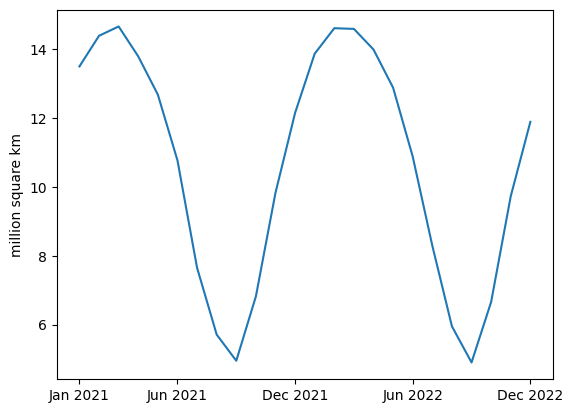

In [116]:
plt.plot(sorted_df['label'], sorted_df['extent'])

plt.xticks([0, 5, 11, 17, 23], sorted_df['label'].iloc[[0, 5, 11, 17, 23]])
plt.ylabel("million square km")
plt.show()

In [3]:
# ice.describe()
yearly_mean = ice.groupby('year')[['extent']].mean().reset_index()
yearly_mean

,year,extent
0,1978,12.660000
1,1979,12.350000
2,1980,12.348333
3,1981,12.146667
4,1982,12.467500
5,1983,12.353333
6,1984,11.920000
7,1985,12.015833
8,1986,12.224167
9,1987,12.267917


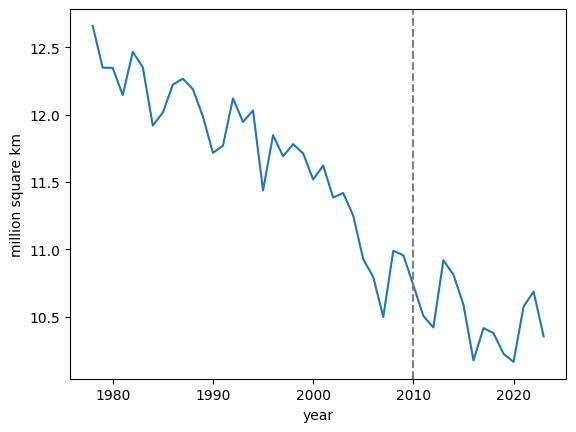

In [29]:
plt.plot(yearly_mean["year"],yearly_mean["extent"])
plt.xlabel("year")
plt.ylabel("million square km")

# showing the test set
plt.axvline(x=2010, linestyle='--', color='gray', label='Horizontal Line at x=2010')

plt.show()

## measure yearly average rate of change

In [5]:
import pandas as pd

# Assuming you have a DataFrame named 'yearly_mean' with columns 'year' and 'extent'
# Replace the following line with your actual DataFrame
# yearly_mean = pd.DataFrame({'year': [2010, 2011, 2012, ...], 'extent': [value1, value2, value3, ...]})

# Calculate the rate of change
first_extent = yearly_mean['extent'].iloc[0]
last_extent = yearly_mean['extent'].iloc[-1]

rate_of_change = ((last_extent - first_extent) / len(yearly_mean['extent'])) * 10

print(f"The rate of change of Arctic ice extent over the entire time period is: {rate_of_change:.2f}%")

The rate of change of Arctic ice extent over the entire time period is: -0.50%


## train test split

In [6]:
from sklearn.model_selection import train_test_split
x = yearly_mean[['year']]
y=yearly_mean[['extent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle = False)

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [7]:
x_train

array([[1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009]], dtype=int64)

## linear regression

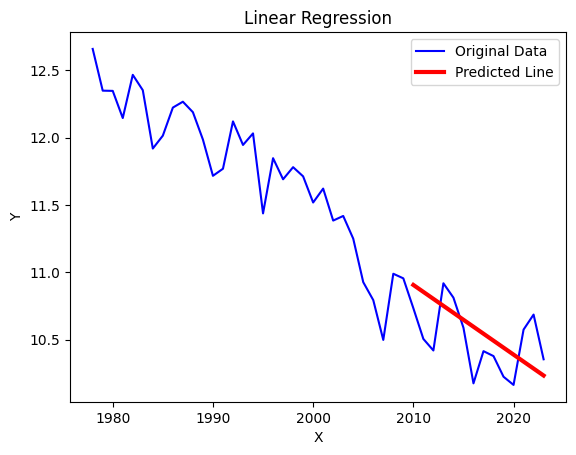

Mean Squared Error: 0.06277197923135061
Mean Absolute Error: 0.2220853461894295
R2 Score: -0.2212773533097212


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = yearly_mean[['year']]
y=yearly_mean[['extent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle = False)

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)


linear_regression_model = LinearRegression()

linear_regression_model.fit(x_train,y_train)


plt.plot(x, y, color='blue', label='Original Data')




# Plot the line using the model parameters
y_pred = linear_regression_model.predict(x_test)
plt.plot(x_test, y_pred, color='red', linewidth=3, label='Predicted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

In [22]:
linear_regression_model.coef_

array([[-0.0517677]])

In [21]:
linear_regression_model.intercept_

array([114.95999511])

In [25]:
## ice free year
-114.95999511 / -0.0517677

2220.689640644649

## SVR

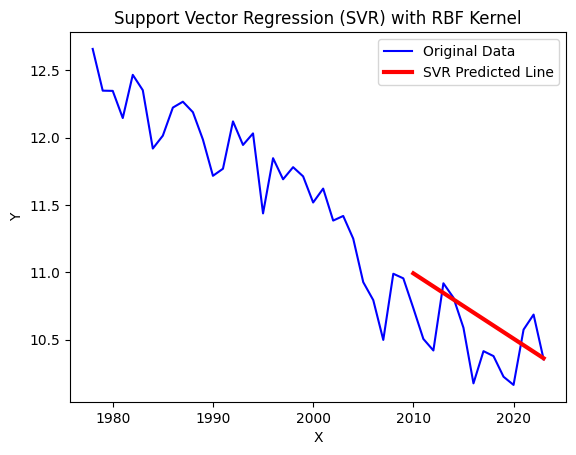

Mean Squared Error: 0.08711398398884183
Mean Absolute Error: 0.24894828399532262
R2 Score: -0.6948698623959109


In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

x = yearly_mean[['year']]
y = yearly_mean[['extent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=False)

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

# Use Support Vector Regression (SVR) with RBF kernel
svr = SVR(kernel='linear')

svr.fit(x_train, y_train.ravel())

plt.plot(x, y, color='blue', label='Original Data')

# Plot the SVR predictions
y_pred = svr.predict(x_test)
plt.plot(x_test, y_pred, color='red', linewidth=3, label='SVR Predicted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Support Vector Regression (SVR) with RBF Kernel')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

In [23]:
svr.coef_

array([[-0.0485119]])

In [24]:
svr.intercept_

array([108.50190475])

In [26]:
-108.50190475 / -0.0485119

2236.6039002801376

In [10]:
x_train

array([[1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009]], dtype=int64)

## graph showing both the models

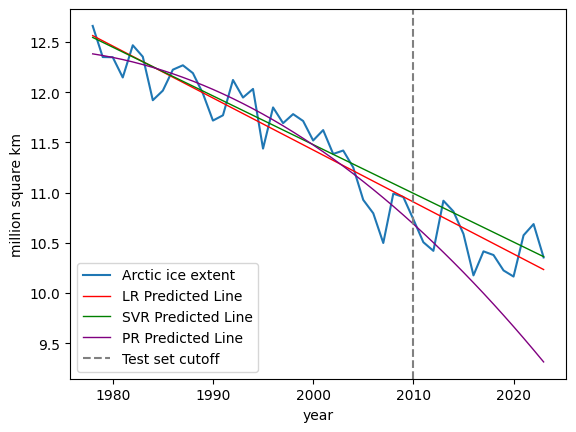

In [68]:
plt.plot(yearly_mean["year"],yearly_mean["extent"], label="Arctic ice extent")
plt.xlabel("year")
plt.ylabel("million square km")

train_test_x = np.concatenate((x_train, x_test), axis=0)

y_pred = linear_regression_model.predict(train_test_x)
plt.plot(train_test_x, y_pred, color='red', linewidth=1, label='LR Predicted Line')

y_pred = svr.predict(train_test_x)
plt.plot(train_test_x, y_pred, color='green', linewidth=1, label='SVR Predicted Line')

y_pred = poly_regression_model.predict(poly_train_test_x)
plt.plot(train_test_x, y_pred, color='purple', linewidth=1, label='PR Predicted Line')

# showing the test set
plt.axvline(x=2010, linestyle='--', color='gray', label='Test set cutoff')

plt.legend()

plt.show()

C:\Users\ahmed\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


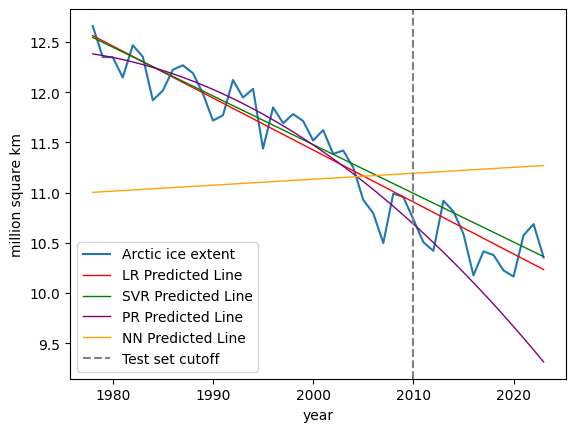

In [96]:
from sklearn.neural_network import MLPRegressor

plt.plot(yearly_mean["year"],yearly_mean["extent"], label="Arctic ice extent")
plt.xlabel("year")
plt.ylabel("million square km")

train_test_x = np.concatenate((x_train, x_test), axis=0)

y_pred = linear_regression_model.predict(train_test_x)
plt.plot(train_test_x, y_pred, color='red', linewidth=1, label='LR Predicted Line')

y_pred = svr.predict(train_test_x)
plt.plot(train_test_x, y_pred, color='green', linewidth=1, label='SVR Predicted Line')

y_pred = poly_regression_model.predict(poly_train_test_x)
plt.plot(train_test_x, y_pred, color='purple', linewidth=1, label='PR Predicted Line')

# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(10), max_iter=10000)
nn_model.fit(x_train, y_train)
y_pred = nn_model.predict(train_test_x)
plt.plot(train_test_x, y_pred, color='orange', linewidth=1, label='NN Predicted Line')

# showing the test set
plt.axvline(x=2010, linestyle='--', color='gray', label='Test set cutoff')

plt.legend()

plt.show()

## Polynomial regression

In [61]:
poly_x_train = np.concatenate((x_train, x_train**2), axis=1)
poly_x_test = np.concatenate((x_test, x_test**2), axis=1)

poly_train_test_x = np.concatenate((poly_x_train, poly_x_test), axis=0)

In [60]:
poly_x_test

array([[   2010, 4040100],
       [   2011, 4044121],
       [   2012, 4048144],
       [   2013, 4052169],
       [   2014, 4056196],
       [   2015, 4060225],
       [   2016, 4064256],
       [   2017, 4068289],
       [   2018, 4072324],
       [   2019, 4076361],
       [   2020, 4080400],
       [   2021, 4084441],
       [   2022, 4088484],
       [   2023, 4092529]], dtype=int64)

In [58]:
np.concatenate((poly_x_train, poly_x_test), axis=0)

array([[   1978, 3912484],
       [   1979, 3916441],
       [   1980, 3920400],
       [   1981, 3924361],
       [   1982, 3928324],
       [   1983, 3932289],
       [   1984, 3936256],
       [   1985, 3940225],
       [   1986, 3944196],
       [   1987, 3948169],
       [   1988, 3952144],
       [   1989, 3956121],
       [   1990, 3960100],
       [   1991, 3964081],
       [   1992, 3968064],
       [   1993, 3972049],
       [   1994, 3976036],
       [   1995, 3980025],
       [   1996, 3984016],
       [   1997, 3988009],
       [   1998, 3992004],
       [   1999, 3996001],
       [   2000, 4000000],
       [   2001, 4004001],
       [   2002, 4008004],
       [   2003, 4012009],
       [   2004, 4016016],
       [   2005, 4020025],
       [   2006, 4024036],
       [   2007, 4028049],
       [   2008, 4032064],
       [   2009, 4036081],
       [   2010, 4040100],
       [   2011, 4044121],
       [   2012, 4048144],
       [   2013, 4052169],
       [   2014, 4056196],
 

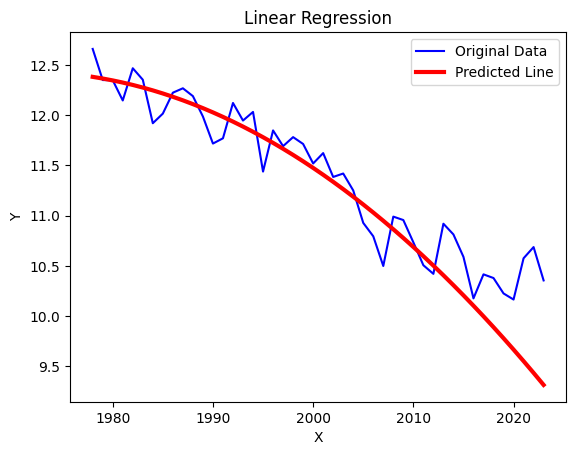

Mean Squared Error: 0.3750240951945334
Mean Absolute Error: 0.4901584412637699
R2 Score: -6.296383514028288


In [67]:
poly_regression_model = LinearRegression()

poly_regression_model.fit(poly_x_train, y_train)
# poly_regression_model.fit(poly_train_test_x, np.concatenate((y_train, y_test), axis=0))



plt.plot(x, y, color='blue', label='Original Data')



# Plot the line using the model parameters
y_pred = poly_regression_model.predict(poly_train_test_x)
plt.plot(train_test_x, y_pred, color='red', linewidth=3, label='Predicted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

y_pred = poly_regression_model.predict(poly_x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

In [74]:
poly_regression_model.coef_

array([[ 4.62109793e+00, -1.17202549e-03]])

In [76]:
poly_regression_model.coef_[0][0]

4.621097930054312

In [75]:
poly_regression_model.coef_[0][1]

-0.0011720254909150139

In [71]:
poly_regression_model.intercept_

array([-4542.61890869])

In [78]:
poly_regression_model.predict([[a,a]])

array([[-4385.54142793]])

In [80]:
import numpy as np
from scipy.optimize import fsolve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have a polynomial regression model named poly_regression_model

# Define the polynomial features
poly = PolynomialFeatures(degree=2)  # You may need to adjust the degree based on your model

# Function to find the roots (where prediction is 0)
def equation_to_solve(a):
    return poly_regression_model.predict([[a, a]])

# Initial guess for 'a'
initial_guess = 0.0

# Solve the equation
solution = fsolve(equation_to_solve, initial_guess)

print("The value of 'a' for which poly_regression_model.predict([[a, a]]) = 0 is:", solution)

ValueError: Found array with dim 3. LinearRegression expected <= 2.

In [32]:
x_train + x_test

ValueError: operands could not be broadcast together with shapes (32,1) (14,1) 

In [33]:
np.concatenate((x_train, x_test), axis=0)

array([[1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023]], dtype=int64)

## Try with temperature data for xtrain

In [11]:
# temperature = pd.read_csv('data/land_ocean_temperature.csv').rename(columns={'Year': 'year'}, inplace=False)
# yearly_mean = yearly_mean.merge(temperature, how='left')

In [12]:
# temperature

In [13]:
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt

# with_temp = yearly_mean.dropna()
# x = with_temp[['year','Lowness (5)']]
# y = with_temp[['extent']]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=False)

# x_train, y_train = np.array(x_train), np.array(y_train)
# x_test, y_test = np.array(x_test), np.array(y_test)

# # Use Support Vector Regression (SVR) with RBF kernel
# model = SVR(kernel='linear')

# model.fit(x_train, y_train.ravel())

# plt.plot(x['year'], y, color='blue', label='Original Data')

# # Plot the SVR predictions
# y_pred = model.predict(x_test)
# plt.plot(x_test[:, 0], y_pred, color='red', linewidth=3, label='SVR Predicted Line')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Support Vector Regression (SVR) with RBF Kernel')
# plt.legend()
# plt.show()

# # Calculate Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# # Calculate Mean Absolute Error
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Mean Absolute Error: {mae}')

# # Calculate R2 Score
# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2}')

In [14]:
x

,year
0,1978
1,1979
2,1980
3,1981
4,1982
5,1983
6,1984
7,1985
8,1986
9,1987


In [15]:
# x_test

In [16]:
# y